In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout, SeparableConv1D, BatchNormalization, InputLayer, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model,to_categorical
import pandas as pd
import seaborn as sns
import time

In [2]:
label_train = np.load("array/label_train_smote.npy")
img_train = np.load("array/img_train_smote.npy")
label_val = np.load("array/label_val.npy")
img_val = np.load("array/img_val.npy")
label_test = np.load("array/label_test.npy")
img_test = np.load("array/img_test.npy")

In [3]:
print(img_train.shape, img_val.shape)
print(label_train.shape, label_val.shape)

(9580, 193) (957, 193)
(9580,) (957,)


In [4]:
label_train = to_categorical(label_train)
label_val = to_categorical(label_val)
label_test = to_categorical(label_test) 


In [5]:
print(label_train.shape, label_val.shape)

(9580, 2) (957, 2)


In [6]:

label_train = np.reshape(label_train, (label_train.shape[0], 2))
img_train = np.reshape(img_train, (img_train.shape[0], img_train.shape[1], 1))
label_val = np.reshape(label_val, (label_val.shape[0], 2))
img_val = np.reshape(img_val, (img_val.shape[0], img_val.shape[1],  1))
label_test = np.reshape(label_test, (label_test.shape[0], 2))
img_test = np.reshape(img_test, (img_test.shape[0], img_test.shape[1],  1))

In [7]:
print(img_train.shape, img_val.shape)
print(label_train.shape, label_val.shape)

(9580, 193, 1) (957, 193, 1)
(9580, 2) (957, 2)


In [8]:
model = Sequential()
model.add(InputLayer(input_shape=(193,1)))

model.add(Conv1D(8, kernel_size=3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(2)) 

model.add(Conv1D(16, kernel_size=3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling1D(2)) 

model.add(Conv1D(32, kernel_size=3))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(500))
model.add(Activation('relu'))

model.add(Dense(450))
model.add(Activation('relu'))

model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'mae'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 191, 8)            32        
_________________________________________________________________
batch_normalization (BatchNo (None, 191, 8)            32        
_________________________________________________________________
activation (Activation)      (None, 191, 8)            0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 95, 8)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 93, 16)            400       
_________________________________________________________________
batch_normalization_1 (Batch (None, 93, 16)            64        
_________________________________________________________________
activation_1 (Activation)    (None, 93, 16)            0

In [9]:
checkpoint = ModelCheckpoint("cough_02.h5", monitor='val_accuracy', verbose=1, 
                             save_best_only=True, save_weights_only=False, mode='auto')

In [10]:
start = time.time()
history = model.fit(img_train,label_train, epochs=200, steps_per_epoch = 5, validation_data=(img_val, label_val),callbacks=[checkpoint])
stop = time.time()
print(f"Training time: {stop - start}s")

Epoch 1/200
5/5 [==============================] - 2s 110ms/step - loss: 0.7168 - accuracy: 0.6379 - mae: 0.3999 - val_loss: 0.4329 - val_accuracy: 0.7513 - val_mae: 0.2777

Epoch 00001: val_accuracy improved from -inf to 0.75131, saving model to cough_02.h5
Epoch 2/200
5/5 [==============================] - 0s 35ms/step - loss: 0.4597 - accuracy: 0.8128 - mae: 0.3156 - val_loss: 0.4456 - val_accuracy: 0.7304 - val_mae: 0.2587

Epoch 00002: val_accuracy did not improve from 0.75131
Epoch 3/200
5/5 [==============================] - 0s 33ms/step - loss: 0.3125 - accuracy: 0.8896 - mae: 0.2311 - val_loss: 0.4678 - val_accuracy: 0.7524 - val_mae: 0.2466

Epoch 00003: val_accuracy improved from 0.75131 to 0.75235, saving model to cough_02.h5
Epoch 4/200
5/5 [==============================] - 0s 37ms/step - loss: 0.2162 - accuracy: 0.9210 - mae: 0.1579 - val_loss: 0.5084 - val_accuracy: 0.7576 - val_mae: 0.2371

Epoch 00004: val_accuracy improved from 0.75235 to 0.75758, saving model to cou

5/5 [==============================] - 0s 34ms/step - loss: 0.0488 - accuracy: 0.9777 - mae: 0.0303 - val_loss: 0.0954 - val_accuracy: 0.9603 - val_mae: 0.0622

Epoch 00035: val_accuracy did not improve from 0.96343
Epoch 36/200
5/5 [==============================] - 0s 34ms/step - loss: 0.0422 - accuracy: 0.9818 - mae: 0.0274 - val_loss: 0.1029 - val_accuracy: 0.9530 - val_mae: 0.0648

Epoch 00036: val_accuracy did not improve from 0.96343
Epoch 37/200
5/5 [==============================] - 0s 33ms/step - loss: 0.0428 - accuracy: 0.9802 - mae: 0.0279 - val_loss: 0.0964 - val_accuracy: 0.9561 - val_mae: 0.0615

Epoch 00037: val_accuracy did not improve from 0.96343
Epoch 38/200
5/5 [==============================] - 0s 33ms/step - loss: 0.0426 - accuracy: 0.9822 - mae: 0.0264 - val_loss: 0.0929 - val_accuracy: 0.9655 - val_mae: 0.0584

Epoch 00038: val_accuracy improved from 0.96343 to 0.96552, saving model to cough_02.h5
Epoch 39/200
5/5 [==============================] - 0s 34ms/step


Epoch 00070: val_accuracy did not improve from 0.96552
Epoch 71/200
5/5 [==============================] - 0s 35ms/step - loss: 0.0212 - accuracy: 0.9886 - mae: 0.0141 - val_loss: 0.1383 - val_accuracy: 0.9467 - val_mae: 0.0518

Epoch 00071: val_accuracy did not improve from 0.96552
Epoch 72/200
5/5 [==============================] - 0s 35ms/step - loss: 0.0210 - accuracy: 0.9899 - mae: 0.0137 - val_loss: 0.1170 - val_accuracy: 0.9530 - val_mae: 0.0459

Epoch 00072: val_accuracy did not improve from 0.96552
Epoch 73/200
5/5 [==============================] - 0s 36ms/step - loss: 0.0203 - accuracy: 0.9903 - mae: 0.0136 - val_loss: 0.0910 - val_accuracy: 0.9707 - val_mae: 0.0376

Epoch 00073: val_accuracy improved from 0.96552 to 0.97074, saving model to cough_02.h5
Epoch 74/200
5/5 [==============================] - 0s 34ms/step - loss: 0.0230 - accuracy: 0.9884 - mae: 0.0151 - val_loss: 0.1003 - val_accuracy: 0.9561 - val_mae: 0.0417

Epoch 00074: val_accuracy did not improve from 0.9

5/5 [==============================] - 0s 35ms/step - loss: 0.0144 - accuracy: 0.9913 - mae: 0.0107 - val_loss: 0.1316 - val_accuracy: 0.9561 - val_mae: 0.0409

Epoch 00106: val_accuracy did not improve from 0.97283
Epoch 107/200
5/5 [==============================] - 0s 34ms/step - loss: 0.0146 - accuracy: 0.9901 - mae: 0.0106 - val_loss: 0.1302 - val_accuracy: 0.9697 - val_mae: 0.0389

Epoch 00107: val_accuracy did not improve from 0.97283
Epoch 108/200
5/5 [==============================] - 0s 36ms/step - loss: 0.0138 - accuracy: 0.9918 - mae: 0.0102 - val_loss: 0.1256 - val_accuracy: 0.9582 - val_mae: 0.0380

Epoch 00108: val_accuracy did not improve from 0.97283
Epoch 109/200
5/5 [==============================] - 0s 37ms/step - loss: 0.0138 - accuracy: 0.9903 - mae: 0.0102 - val_loss: 0.1244 - val_accuracy: 0.9561 - val_mae: 0.0377

Epoch 00109: val_accuracy did not improve from 0.97283
Epoch 110/200
5/5 [==============================] - 0s 35ms/step - loss: 0.0143 - accuracy: 0


Epoch 00141: val_accuracy did not improve from 0.97283
Epoch 142/200
5/5 [==============================] - 0s 38ms/step - loss: 0.0119 - accuracy: 0.9925 - mae: 0.0086 - val_loss: 0.1638 - val_accuracy: 0.9603 - val_mae: 0.0408

Epoch 00142: val_accuracy did not improve from 0.97283
Epoch 143/200
5/5 [==============================] - 0s 36ms/step - loss: 0.0119 - accuracy: 0.9906 - mae: 0.0086 - val_loss: 0.1729 - val_accuracy: 0.9561 - val_mae: 0.0424

Epoch 00143: val_accuracy did not improve from 0.97283
Epoch 144/200
5/5 [==============================] - 0s 36ms/step - loss: 0.0118 - accuracy: 0.9926 - mae: 0.0085 - val_loss: 0.1687 - val_accuracy: 0.9582 - val_mae: 0.0411

Epoch 00144: val_accuracy did not improve from 0.97283
Epoch 145/200
5/5 [==============================] - 0s 36ms/step - loss: 0.0116 - accuracy: 0.9923 - mae: 0.0085 - val_loss: 0.1770 - val_accuracy: 0.9572 - val_mae: 0.0422

Epoch 00145: val_accuracy did not improve from 0.97283
Epoch 146/200
5/5 [=====

5/5 [==============================] - 0s 35ms/step - loss: 0.0116 - accuracy: 0.9927 - mae: 0.0083 - val_loss: 0.1727 - val_accuracy: 0.9592 - val_mae: 0.0385

Epoch 00177: val_accuracy did not improve from 0.97283
Epoch 178/200
5/5 [==============================] - 0s 37ms/step - loss: 0.0117 - accuracy: 0.9921 - mae: 0.0084 - val_loss: 0.1625 - val_accuracy: 0.9582 - val_mae: 0.0379

Epoch 00178: val_accuracy did not improve from 0.97283
Epoch 179/200
5/5 [==============================] - 0s 36ms/step - loss: 0.0121 - accuracy: 0.9927 - mae: 0.0082 - val_loss: 0.1604 - val_accuracy: 0.9572 - val_mae: 0.0370

Epoch 00179: val_accuracy did not improve from 0.97283
Epoch 180/200
5/5 [==============================] - 0s 37ms/step - loss: 0.0117 - accuracy: 0.9910 - mae: 0.0085 - val_loss: 0.1691 - val_accuracy: 0.9582 - val_mae: 0.0381

Epoch 00180: val_accuracy did not improve from 0.97283
Epoch 181/200
5/5 [==============================] - 0s 36ms/step - loss: 0.0114 - accuracy: 0

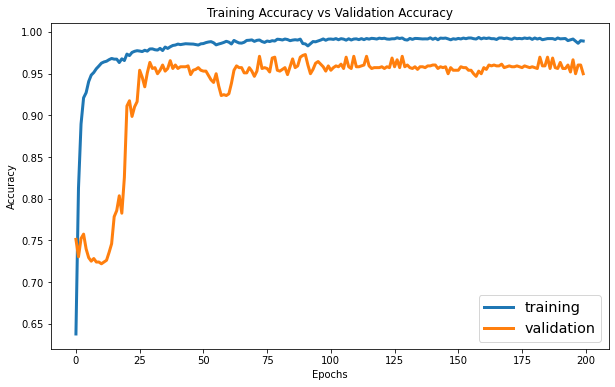

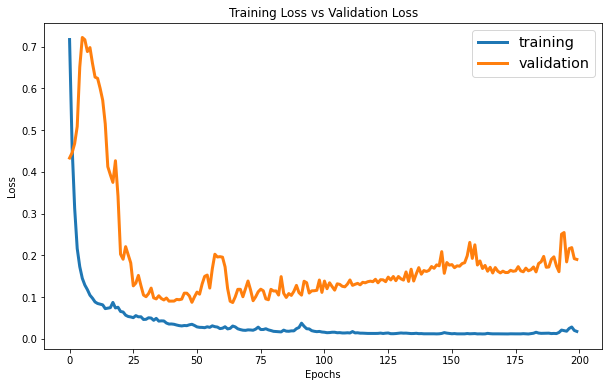

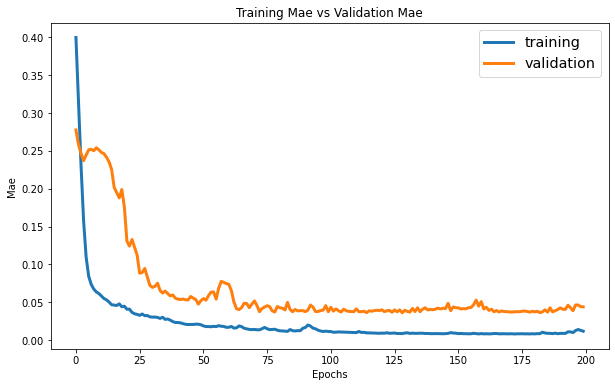

In [11]:
plt.figure(figsize=(10,6))
plt.plot(history.history['accuracy'], label = 'training', linewidth = 3)
plt.plot(history.history['val_accuracy'], label = 'validation', linewidth = 3)
plt.title('Training Accuracy vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(fontsize = 'x-large')
plt.show()
#plt.savefig("Pic/Training Accuracy vs Validation Accuracy_Batuk.jpg")

plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label = 'training', linewidth = 3)
plt.plot(history.history['val_loss'], label = 'validation', linewidth = 3)
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(fontsize = 'x-large')
plt.show()

plt.figure(figsize=(10,6))
plt.plot(history.history['mae'], label = 'training', linewidth = 3)
plt.plot(history.history['val_mae'], label = 'validation', linewidth = 3)
plt.title('Training Mae vs Validation Mae')
plt.xlabel('Epochs')
plt.ylabel('Mae')
plt.legend(fontsize = 'x-large')
plt.show()
#plt.savefig("Pic/Training Loss vs Validation Loss_Batuk.jpg")

In [12]:
model.load_weights("cough_02.h5")

              precision    recall  f1-score   support

       cough       0.98      0.92      0.95       273
        talk       0.97      0.99      0.98       684

    accuracy                           0.97       957
   macro avg       0.98      0.96      0.97       957
weighted avg       0.97      0.97      0.97       957



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

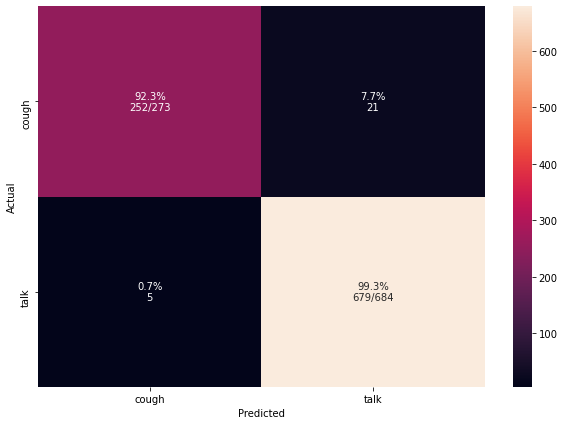

In [13]:
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
matrix_index = ['cough', 'talk']

preds = model.predict(img_val)
classpreds = np.argmax(preds, axis=1) # predicted classes 
y_testclass = np.argmax(label_val, axis=1) # true classes

cm = confusion_matrix(y_testclass, classpreds)
print(classification_report(y_testclass, classpreds, target_names=matrix_index))

# Get percentage value for each element of the matrix
cm_sum = np.sum(cm, axis=1, keepdims=True)
cm_perc = cm / cm_sum.astype(float) * 100
annot = np.empty_like(cm).astype(str)
nrows, ncols = cm.shape
for i in range(nrows):
    for j in range(ncols):
        c = cm[i, j]
        p = cm_perc[i, j]
        if i == j:
            s = cm_sum[i]
            annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
        elif c == 0:
            annot[i, j] = ''
        else:
            annot[i, j] = '%.1f%%\n%d' % (p, c)


# Display confusion matrix 
df_cm = pd.DataFrame(cm, index = matrix_index, columns = matrix_index)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(df_cm, annot=annot, fmt='')
#plt.savefig("Pic/Table Crosscheck_Batuk.jpg")

              precision    recall  f1-score   support

       cough       0.97      0.91      0.94       549
        talk       0.97      0.99      0.98      1369

    accuracy                           0.97      1918
   macro avg       0.97      0.95      0.96      1918
weighted avg       0.97      0.97      0.97      1918



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

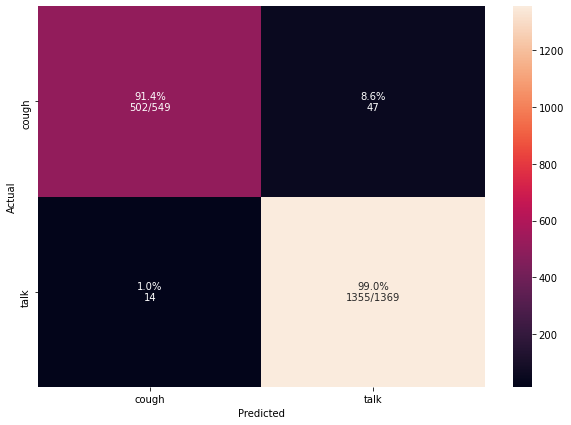

In [14]:
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
matrix_index = ['cough', 'talk']

preds = model.predict(img_test)
classpreds = np.argmax(preds, axis=1) # predicted classes 
y_testclass = np.argmax(label_test, axis=1) # true classes

cm = confusion_matrix(y_testclass, classpreds)
print(classification_report(y_testclass, classpreds, target_names=matrix_index))

# Get percentage value for each element of the matrix
cm_sum = np.sum(cm, axis=1, keepdims=True)
cm_perc = cm / cm_sum.astype(float) * 100
annot = np.empty_like(cm).astype(str)
nrows, ncols = cm.shape
for i in range(nrows):
    for j in range(ncols):
        c = cm[i, j]
        p = cm_perc[i, j]
        if i == j:
            s = cm_sum[i]
            annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
        elif c == 0:
            annot[i, j] = ''
        else:
            annot[i, j] = '%.1f%%\n%d' % (p, c)


# Display confusion matrix 
df_cm = pd.DataFrame(cm, index = matrix_index, columns = matrix_index)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(df_cm, annot=annot, fmt='')
#plt.savefig("Pic/Table Crosscheck_Batuk.jpg")